# imports

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from ipywidgets import interact

import numpy as np
import random

# initialize GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Digit classification with [MNIST Dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html)

## data preprocess

### load the dataset

In this section, we'll be starting by loading the MNIST dataset and preparing it for use with our neural network. The MNIST dataset is a widely used collection of handwritten digit images, a classic example for training image classification models.

for more info: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
# MNIST dataset
# Load the MNIST training dataset and apply transformations
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(), # to convert PIL images or numpy arrays into PyTorch tensors
                                           download=True)



# Load the MNIST testing dataset and apply transformations
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:02<00:00, 4689838.74it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 513866.03it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:01<00:00, 916886.61it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 11538781.81it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### initialize the data loaders

Now that we have our training and testing datasets prepared, this section focuses on creating iterators, known as data loaders, to efficiently feed data into our neural network during training and evaluation. We'll be using the torch.utils.data.DataLoader class from the PyTorch library.

for more info: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

* **Batching:** It loads the data in batches, which is essential for training neural networks efficiently. Instead of loading the entire dataset into memory at once, it loads small batches of data.
* **Shuffling:** It can shuffle the data for every epoch during training. Shuffling ensures that the model does not learn from the order of the data and prevents it from memorizing patterns in the data.
* **Parallelizing data loading:** DataLoader can load data in parallel using multiple worker processes. This can speed up data loading, especially when working with large datasets and complex data transformations.

In [ ]:
BATCH_SIZE = 100

In [ ]:
# Data loader
# Create a data loader for the training dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

# Create a data loader for the testing dataset
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

### data investigation

The MNIST dataset serves as a cornerstone for many computer vision tasks, particularly image classification. Before diving into training a neural network, it's essential to explore and understand the characteristics of the data we'll be using. This section will guide us through investigating the MNIST dataset to gain valuable insights.

> We'll employ a two-pronged approach for this data exploration:
>
>* Visualizing the Training Data: We'll create a grid showcasing a sample set of images from the training data. This visualization can reveal the variations and characteristics of the handwritten digits within the MNIST dataset.
>* Analyzing Label Distribution: We'll examine the distribution of labels (the actual digit values) across the training data. This helps us understand the balance between different digit classes and identify any potential class imbalances that might require attention during training.

In [ ]:
h

#### let's view the images in a grid format

Having loaded and prepared our MNIST dataset for training a neural network, this section delves into visualizing a sample of the training images.

> Why do we need to visualize our data?
> * **Gain insights into the data distribution:** By looking at a representative sample of images, you can get a feel for the variations and characteristics of the handwritten digits in the MNIST dataset.
> * **Identify potential issues:** Visualizing the data might reveal any abnormalities or biases within the dataset that could impact your model's performance.

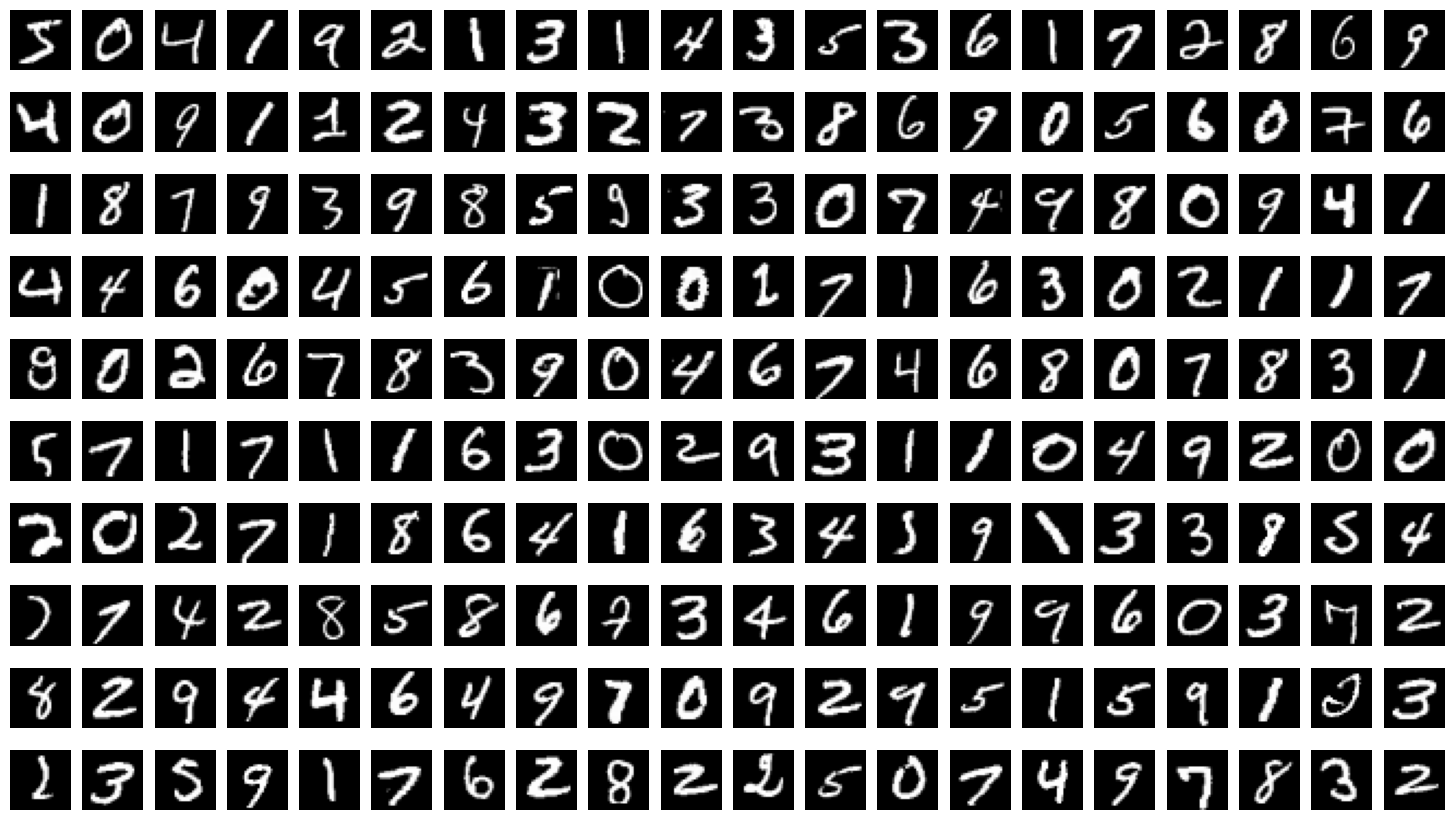

In [ ]:
# Define the number of rows and columns for the image grid
rows = 10
cols = 20

# Create a grid of images from the training dataset
for i in range(rows):
    for j in range(cols):
        # Create a subplot at the specified position in the grid
        plt.subplot(rows, cols, 1 + i * cols + j)

        # Access the image data for the current sample index
        sample = train_dataset[i * cols + j]
        img = sample[0]

        # Convert the image data to a format suitable for display
        img = img.squeeze()

        # Display the image in grayscale
        plt.imshow(img)
        plt.gray()

        # Turn off the axis labels and ticks for a cleaner grid layout
        plt.axis('off')

# Set the size of the entire figure to accommodate the grid
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

#### let's look at number of samples per each digit

This section focuses on analyzing the distribution of labels within the MNIST training dataset. Labels represent the actual digit values (0-9) that the images correspond to.

Num labels: 10


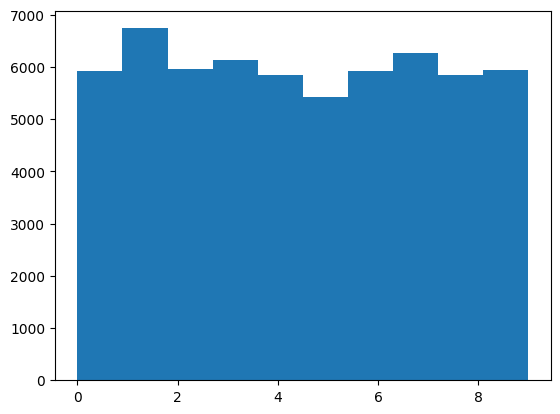

In [ ]:
# Initialize an empty list to store all labels encountered in the training dataset
all_labels = []

# Loop through each sample in the training dataset
for i in range(len(train_dataset)):

    # Extract the label from the current sample
    _, label = train_dataset[i]
    # The first element (image) is discarded using '_' as we're only interested in labels here

    # Append the extracted label to the list of all labels
    all_labels.append(label)

# Create a histogram to visualize the distribution of labels (frequency of each label value)
plt.hist(all_labels)

# Calculate the number of unique labels (number of different classes)
num_labels = len(set(all_labels))
# A set removes duplicates, so its length represents the number of unique labels

# Print the total number of unique labels found in the training dataset
print(f'Num labels: {num_labels}')


#### data loader

In PyTorch, a **DataLoader** is a utility class that simplifies loading data from a dataset and preparing it for training a deep learning model, specifically computer vision models in our case. It offers several advantages:

* **Batching:** It automatically splits our data into manageable batches, which is how neural networks typically process data during training.
* **Efficiency:** It can handle loading data from disk or other sources efficiently, including using multiple worker threads to parallelize the loading process.
* **Flexibility:** It allows you to define how the data is transformed (e.g., resizing images, normalizing pixel values) before feeding it to our model through a customizable collate_fn function.

Overall, DataLoader streamlines data handling, making our training code more concise and efficient.

Image shape: torch.Size([100, 1, 28, 28])
Labels shape: torch.Size([100])


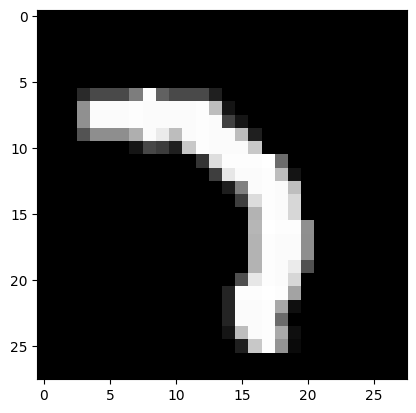

In [ ]:
# Loop through each batch of data in the training loader
for i, (images, labels) in enumerate(train_loader):

    # Check if we have reached the third batch (index starts at 0)
    if i == 3:
        # Display the first image from the third batch
        plt.imshow(images[0, 0, :, :])  # Access the first image (index 0) in the first channel (index 0)
        break  # Exit the loop after displaying the image

# Print the shapes of the images and labels tensors
print(f'Image shape: {images.shape}') # (batch_size, channels, height, width)
print(f'Labels shape: {labels.shape}')

## classification using MLP

Now that we've explored the MNIST dataset, it's time to construct the core of our image classification system: the neural network model. This section introduces the Multilayer Perceptron (MLP), a fundamental neural network architecture commonly used for various classification tasks.

In [ ]:
num_classes = num_labels

images_size = images.shape
input_size = images_size[2] * images_size[3]

#### define the model

Here, we'll be defining a Python class named MLP that inherits from PyTorch's nn.Module class, a fundamental building block for constructing neural networks. Within this class definition, we'll establish the network architecture of our MLP model, including:

* **Layers:** We'll define the layers that make up the network, most likely using nn.Linear layers for fully-connected operations.
* **Activation Functions:** We'll introduce non-linearity using activation functions like ReLU (Rectified Linear Unit) to enable the network to learn complex patterns within the data.

In [ ]:
# Defining a class for a Multilayer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        """
        Initializes the MLP model with the given parameters.

        Args:
            input_size (int): Number of features in the input data.
            hidden_size (int): Number of neurons in the hidden layer.
            num_classes (int): Number of classes for classification tasks.
        """
        super(MLP, self).__init__()                     # call the constructor of the nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)   # Define the first fully connected layer
        self.relu = nn.ReLU()                           # Define the ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Define the second fully connected layer

    def forward(self, x):
        """
        Defines the forward pass through the MLP network.

        Args:
            x (tensor): Input data to be processed by the network.

        Returns:
            tensor: Output of the network after passing through all layers.
        """
        # Forward pass through the network
        out = self.fc1(x)       # Pass input through the first fully connected layer
        out = self.relu(out)    # Apply ReLU activation function
        out = self.fc2(out)     # Pass output of the first layer through the second fully connected layer
        return out

#### train the model

##### define the training function

We'll define a function named train_model that orchestrates the training process.

In [ ]:
def train_model(model, criterion, optimizer, data_loader, num_epochs):
    """
    Trains the provided PyTorch model for a specified number of epochs.

    Args:
        model (nn.Module): PyTorch model to be trained.
        criterion (nn.Module): Loss function used for calculating training loss.
        optimizer (torch.optim): Optimizer used for updating model weights.
        data_loader (DataLoader): PyTorch dataloader containing training data.
        num_epochs (int): Number of epochs to train the model for.
    """

    # Get the total number of batches in the data loader
    total_step = len(data_loader)

    for epoch in range(num_epochs):
        """
        Iterate over each epoch (full pass through the training data)
        """
        for i, (images, labels) in enumerate(data_loader):
            """
            Iterate over each batch of data within the current epoch
            """

            # Move tensors to the configured device (CPU or GPU)
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            # Forward pass: Pass the images through the model
            outputs = model(images)

            # Calculate the loss based on the outputs and labels
            loss = criterion(outputs, labels)

            # Backward pass: Calculate gradients for the loss w.r.t. model parameters
            optimizer.zero_grad()
            loss.backward()

            # Update model weights based on the calculated gradients
            optimizer.step()

            # Print training progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss}')


##### configure the hyperparameters

 Hyperparameters are crucial settings that control how the model learns from the data. Here, we'll establish three key hyperparameters:

* `HIDDEN_SIZE`: This parameter determines the number of neurons in the hidden layer of the MLP architecture. The hidden layer plays a vital role in the model's ability to learn complex patterns within the data.
* `NUM_EPOCHS`: This parameter specifies the number of times we want to iterate through the entire training dataset during training. Each pass is called an epoch.
* `LEARNING_RATE`: This hyperparameter controls the step size taken by the optimizer when updating the model's weights during training. A higher learning rate might lead to faster learning but could also result in instability.

In [ ]:
# Hyperparameters
HIDDEN_SIZE = 50
NUM_EPOCHS = 2
LEARNING_RATE = 0.001

##### training

* [**Cross entropy loss**](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) is a common choice for multi-class classification problems like MNIST. The loss function quantifies the discrepancy between the model's predictions and the ground-truth labels, guiding the training process.

* [**Adam**](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) is a popular optimization algorithm that adapts learning rates for different parameters during training, often leading to faster convergence and improved performance.

*More info about Adam:*

> Adam (Adaptive Moment Estimation) is an optimizer for neural networks that excels at updating weights and biases during training. It builds upon Stochastic Gradient Descent (SGD) by incorporating:
>
> * **Momentum**: Accumulates past gradients to smooth the update direction and accelerate learning.
> * **Adaptive Learning Rates**: Adjusts the learning rate for each parameter individually based on its gradient history, preventing large oscillations and getting stuck.
>
>Adam is popular for its:
>
> * **Faster convergence**: Often reaches optimal solutions quicker than SGD.
> * **Efficiency**: Handles sparse gradients well and requires less hyperparameter tuning.

In [ ]:
# Model
# Create an MLP model instance with the specified input size, hidden layer size, and number of classes
model = MLP(input_size, HIDDEN_SIZE, num_classes).to(device)

# Loss and optimizer
# Define the loss function (CrossEntropyLoss commonly used for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam is a popular optimizer that adapts learning rates)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train
# Train the model for the specified number of epochs using the provided data loader
train_model(model, criterion, optimizer, train_loader, NUM_EPOCHS)


NameError: name 'MLP' is not defined

#### evaluate the model

After training our MLP model, it's crucial to evaluate its performance on unseen data. This section introduces the eval_model function, which takes the trained model as input and assesses its accuracy on the MNIST test dataset.

##### define the evaluation function

In [ ]:
def eval_model(model):
    """
    Evaluates the performance of the trained model on the test data.

    Args:
        model (nn.Module): PyTorch model to be evaluated.
    """

    correct = 0
    total = 0

    # Loop through all data in the test loader
    for images, labels in test_loader:
        # Move tensors to the configured device (CPU or GPU)
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass: Pass the images through the model
        outputs = model(images)

        # Get the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct count based on prediction accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and print the test accuracy
    accuracy = 100 * correct / total
    print('Accuracy of the network on the 10000 test images: {} %'.format(accuracy))


##### evaluation

In [ ]:
eval_model(model)

Accuracy of the network on the 10000 test images: 94.03 %


#### test the models using samples from the dataset

Now that we've trained our MLP model and assessed its overall performance on the test dataset, let's delve deeper into individual predictions. This section explores two key aspects:

* **Softmax Function:** We'll define a function named softmax that calculates the softmax function. Softmax is crucial for interpreting the output of our model, as it transforms the raw output values into a probability distribution. This distribution indicates the likelihood of each class for a given input image.

* **Sample Image Display:** We'll create a function named ShowSample that retrieves a sample image from the test dataset along with its ground-truth label. The function will then utilize the trained model to predict the class for the image. We'll leverage the previously defined softmax function to convert the model's output into class probabilities. Finally, libraries like matplotlib.pyplot (imported as plt here) will be used to display the image along with its predicted label and the corresponding score.

interactive(children=(IntSlider(value=4999, description='i', max=9999), Output()), _dom_classes=('widget-inter…

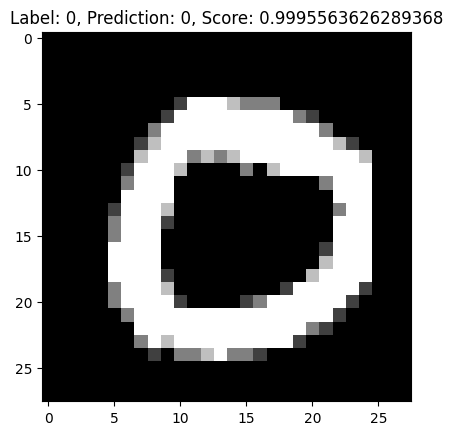

In [ ]:
# Softmax function
def softmax(x):
    """
    Calculates the softmax function for a given input vector.

    Args:
        x (tensor): Input vector.

    Returns:
        tensor: Softmax probability distribution over the elements of the input.
    """
    return torch.exp(x) / torch.exp(x).sum()

# Function to display a sample image and prediction
def ShowSample(i):
    """
    Displays a sample image from the test dataset along with its predicted label and score.

    Args:
        i (int): Index of the sample image to display (within the range of test dataset).
    """

    img, label = test_dataset[i]  # Access image and label at index i

    # Move image data to the configured device (CPU or GPU)
    input = img.to(device)

    # Reshape the image data for the model input
    input = input.reshape(-1, input_size)

    # Get model predictions for the input image
    outputs = model(input)

    # Apply softmax function to convert outputs to probabilities
    outputs = softmax(outputs)

    # Get the predicted class with the highest probability
    score, prediction = torch.max(outputs.data, 1)

    # Convert image data to a format suitable for display
    img = img.squeeze()

    # Display the image
    plt.imshow(img)
    plt.gray()

    # Create a title with label, prediction, and score information
    plt.title(f'Label: {label}, Prediction: {prediction.item()}, Score: {score.item()}')

# Interactive exploration using ipywidgets.interact
interact(ShowSample, i=(0, len(test_dataset) - 1));


# Classification with [CIFAR Dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html) (using shallow feature extraction)

## data preprocess

### load the dataset

In [ ]:
"""
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)): This transformation normalizes the pixel values of each image in the dataset.
We need three parameters to normalize each channel. The first tuple (0.5, 0.5, 0.5) is the mean for all three channels and the second (0.5, 0.5, 0.5) is the standard deviation for all three channels.
"""

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)


test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 38248287.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### initialize the classes

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### initialize the data loaders

In [ ]:
BATCH_SIZE = 100

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
    )


test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
    )

### visualize some samples

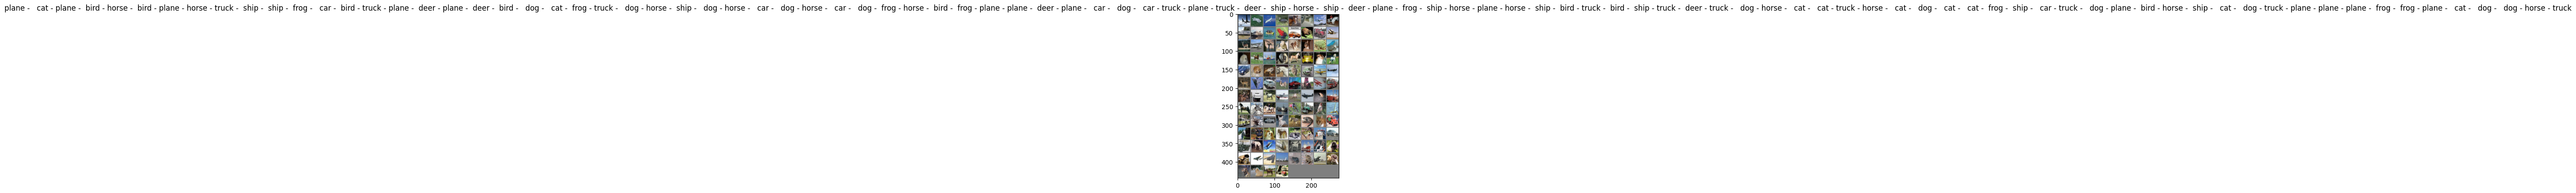

In [ ]:
# Function to show images with labels
def imshow(img, labels):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(' - '.join('%5s' % classes[labels[j]] for j in range(len(labels))))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images), labels)

## training

### define the model

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

### define the function for extracting features of images to use during training

In [ ]:
# Color Histogram Feature Extraction
def extract_features(images):
    """
    Extract color histogram features from a list of images.

    Args:
        images (list): List of images.

    Returns:
        torch.Tensor: Color histogram features.
    """
    features = []
    for img in images:
        # Convert image to numpy array and transpose dimensions
        img = img.cpu().numpy().transpose(1, 2, 0)
        hist = []
        for i in range(3):  # for each channel
            # Compute histogram for each channel
            channel_hist = np.histogram(img[:,:,i], bins=10, range=(0, 1))[0]
            hist.extend(channel_hist)
        features.append(hist)
    return torch.tensor(features)

In [ ]:
# Get the feature vector of an image from the dataset

image_index = 0
image, label = train_dataset[image_index]
feature_vector = extract_features(image.unsqueeze(0))  # Add a batch dimension
print("Feature vector shape:", feature_vector.shape)

Feature vector shape: torch.Size([1, 30])


### define the training function & train

In [ ]:
print("Input size:",  train_dataset[0][0].shape)

Input size: torch.Size([3, 32, 32])


In [ ]:
INPUT_SIZE = 30
EPOCHS = 5
LEARNING_RATE = 0.001

In [ ]:
HIDDEN_SIZE = 10
NUM_CLASSES = len(classes)

In [ ]:
len(train_loader)

500

In [ ]:
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU

            # Extract features from images using color histograms
            features = extract_features(images)

            # Reshape features to fit the MLP input size
            features = features.view(features.size(0), -1).float()

            # Forward pass
            outputs = model(features.to(device))
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    print('Finished Training')

model = MLP(INPUT_SIZE, HIDDEN_SIZE, NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_loader, criterion, optimizer)

Epoch [1/5], Step [100/500], Loss: 3.3273
Epoch [1/5], Step [200/500], Loss: 2.5334
Epoch [1/5], Step [300/500], Loss: 2.4780
Epoch [1/5], Step [400/500], Loss: 2.3349
Epoch [1/5], Step [500/500], Loss: 2.5503
Epoch [2/5], Step [100/500], Loss: 2.5688
Epoch [2/5], Step [200/500], Loss: 2.3565
Epoch [2/5], Step [300/500], Loss: 2.3010
Epoch [2/5], Step [400/500], Loss: 2.2829
Epoch [2/5], Step [500/500], Loss: 2.3003
Epoch [3/5], Step [100/500], Loss: 2.3022
Epoch [3/5], Step [200/500], Loss: 2.3092
Epoch [3/5], Step [300/500], Loss: 2.3610
Epoch [3/5], Step [400/500], Loss: 2.3046
Epoch [3/5], Step [500/500], Loss: 2.3020
Epoch [4/5], Step [100/500], Loss: 2.2849
Epoch [4/5], Step [200/500], Loss: 2.3001
Epoch [4/5], Step [300/500], Loss: 2.3049
Epoch [4/5], Step [400/500], Loss: 2.3021
Epoch [4/5], Step [500/500], Loss: 2.2990
Epoch [5/5], Step [100/500], Loss: 2.3039
Epoch [5/5], Step [200/500], Loss: 2.3027
Epoch [5/5], Step [300/500], Loss: 2.3028
Epoch [5/5], Step [400/500], Loss:

## evaluate the model

In [ ]:
def eval(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU

            # Extract features from images using color histograms
            features = extract_features(images)

            # Reshape features to fit the MLP input size
            features = features.view(features.size(0), -1).to(device)

            # Forward pass
            outputs = model(features.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print('Accuracy of the network on the test images: {:.2f} %'.format(accuracy))
        return accuracy

accuracy = eval(model, test_loader)

Accuracy of the network on the test images: 10.20 %


## test the model

In [ ]:
def test(model, test_data, classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    with torch.no_grad():
        image, label = test_data
        image = image.unsqueeze(0).to(device) # Move data to GPU and add batch dimension

        # Extract features from image using color histograms
        features = extract_features(image)

        # Reshape features to fit the MLP input size
        features = features.view(features.size(0), -1).to(device)

        # Forward pass
        outputs = model(features.float())
        _, prediction = torch.max(outputs.data, 1)

        image = image.squeeze().cpu()
        plt.imshow(image.permute(1, 2, 0))
        plt.gray()

        plt.title(f'Label: {classes[label]}, Prediction: {classes[prediction.item()]}')

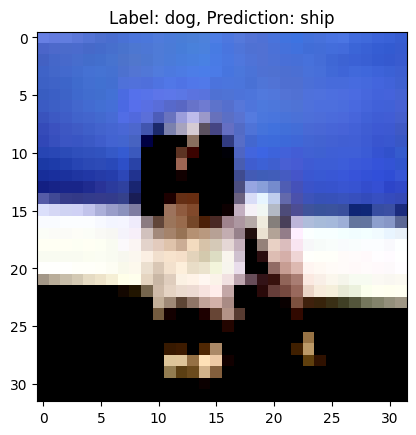

In [ ]:
i = random.randint(0, len(test_dataset))
test(model, test_dataset[i], classes)